In [43]:
import sys
import re, string
import pandas as pd

from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split


%matplotlib inline

In [45]:
sys.version_info

sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)

### Funcs

In [14]:
def iou(y_real, y_pred):
    return (y_real & y_pred).sum() / (y_real | y_pred).sum()

In [36]:
re_tok = re.compile('[%s]' % re.escape(string.punctuation+"“”¨«»®´·º½¾¿¡§£₤‘’"))
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

### Read and Explore Train Data

#### 1. Read:

In [15]:
train = pd.read_csv("data/train.csv")

In [16]:
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [17]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [18]:
train['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [19]:
# replace Nones by "unknown"
COMMENT = 'comment_text'
train[COMMENT].fillna("unknown", inplace=True)

#### 2. Describe labels fracs and stats:

In [20]:
for col in train.columns[2:]:
    print(col, ":", train[col].sum()/train.shape[0])

toxic : 0.0958444830201
severe_toxic : 0.00999555056997
obscene : 0.0529482174079
threat : 0.00299553176956
insult : 0.049363606169
identity_hate : 0.00880485802558


In [21]:
# add none label and describe labels stats:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.iloc[:, 2:].describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3. Analyze Comments lengths

In [22]:
lens = train.comment_text.str.len() # number of chars
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048923, 5000)

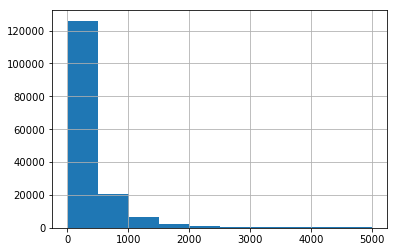

In [23]:
lens.hist()

### Tokenization

In [40]:
tokenize("I am the right guy for you!")

error: invalid group reference 1 at position 2

### Simple Binary Classification

In [ ]:
X = train.comment_text
y = train.toxic

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

#### 1. Simple SVM

In [ ]:
vect = CountVectorizer(ngram_range=(1,2))
XX_train = vect.fit_transform(X_train)

In [ ]:
clf = SVC()
clf.fit(XX_train, y_train)